# K-means Clustering

### Import resources and display image

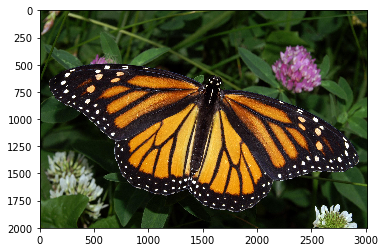

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/monarch.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

### Prepare data for k-means

In [2]:
# Reshape image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image_copy.reshape((-1, 3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)

### Implementing k-means clustering

In [3]:
type(cv2.TERM_CRITERIA_EPS)

int

In [4]:
cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER

3

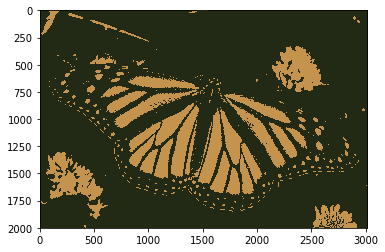

In [5]:
# Define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Perform k-means clustering
k = 2
# k = 10
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# Reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image_copy.shape))
labels_reshape = labels.reshape(image_copy.shape[:-1])

plt.imshow(segmented_image)

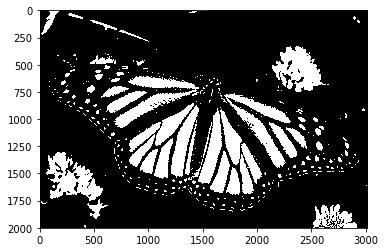

In [6]:
# Visualize one segment

plt.imshow(labels_reshape == 1, cmap='gray')

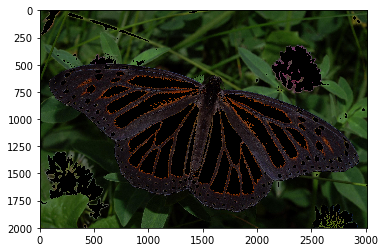

In [7]:
# Mask image segment

masked_image = np.copy(image_copy)

masked_image[labels_reshape == 1] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)